## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 13s 64ms/step - loss: 2.1005 - accuracy: 0.2433 - val_loss: 1.9576 - val_accuracy: 0.3163
Epoch 2/500
196/196 [==============================] - 6s 32ms/step - loss: 1.8987 - accuracy: 0.3363 - val_loss: 1.8471 - val_accuracy: 0.3543
Epoch 3/500
196/196 [==============================] - 7s 35ms/step - loss: 1.8143 - accuracy: 0.3667 - val_loss: 1.7923 - val_accuracy: 0.3764
Epoch 4/500
196/196 [==============================] - 7s 35ms/step - loss: 1.7588 - accuracy: 0.3856 - val_loss: 1.7361 - val_accuracy: 0.3991
Epoch 5/500
196/196 [==============================] - 6s 33ms/step - loss: 1.7171 - accuracy: 0.4002 - val_loss: 1.7039 - val_accuracy: 0.3997
Epoch 6/500
196/196 [==============================] - 6s 32ms/step - loss: 1.6835 - accuracy: 0.4123 - val_loss: 1.6758 - val_accuracy: 0.4147
Epoch 7/500
196/196 [==============================] - 6s 33ms/step - loss: 1.6548 - accuracy: 0.4218 - val_loss: 1.6449 - val_accuracy

196/196 [==============================] - 7s 36ms/step - loss: 1.0755 - accuracy: 0.6236 - val_loss: 1.3632 - val_accuracy: 0.5184
Epoch 58/500
196/196 [==============================] - 7s 36ms/step - loss: 1.0671 - accuracy: 0.6254 - val_loss: 1.3702 - val_accuracy: 0.5213
Epoch 59/500
196/196 [==============================] - 7s 36ms/step - loss: 1.0622 - accuracy: 0.6282 - val_loss: 1.3735 - val_accuracy: 0.5148
Epoch 60/500
196/196 [==============================] - 7s 37ms/step - loss: 1.0522 - accuracy: 0.6302 - val_loss: 1.3277 - val_accuracy: 0.5307
Epoch 61/500
196/196 [==============================] - 7s 37ms/step - loss: 1.0436 - accuracy: 0.6342 - val_loss: 1.4645 - val_accuracy: 0.5043
Epoch 62/500
196/196 [==============================] - 8s 39ms/step - loss: 1.0385 - accuracy: 0.6372 - val_loss: 1.3308 - val_accuracy: 0.5358
Epoch 63/500
196/196 [==============================] - 8s 39ms/step - loss: 1.0271 - accuracy: 0.6409 - val_loss: 1.3359 - val_accuracy: 0.535

196/196 [==============================] - 7s 36ms/step - loss: 0.6928 - accuracy: 0.7597 - val_loss: 2.0144 - val_accuracy: 0.4448
Epoch 114/500
196/196 [==============================] - 7s 35ms/step - loss: 0.7007 - accuracy: 0.7584 - val_loss: 1.6350 - val_accuracy: 0.5037
Epoch 115/500
196/196 [==============================] - 7s 35ms/step - loss: 0.6776 - accuracy: 0.7644 - val_loss: 1.4994 - val_accuracy: 0.5351
Epoch 116/500
196/196 [==============================] - 7s 37ms/step - loss: 0.6749 - accuracy: 0.7657 - val_loss: 1.5336 - val_accuracy: 0.5250
Epoch 117/500
196/196 [==============================] - 7s 35ms/step - loss: 0.6647 - accuracy: 0.7686 - val_loss: 1.9069 - val_accuracy: 0.4649
Epoch 118/500
196/196 [==============================] - 7s 34ms/step - loss: 0.6661 - accuracy: 0.7714 - val_loss: 1.5350 - val_accuracy: 0.5213
Epoch 119/500
196/196 [==============================] - 7s 34ms/step - loss: 0.6567 - accuracy: 0.7710 - val_loss: 1.5829 - val_accuracy:

196/196 [==============================] - 7s 35ms/step - loss: 0.3763 - accuracy: 0.8775 - val_loss: 2.0636 - val_accuracy: 0.4979
Epoch 170/500
196/196 [==============================] - 7s 34ms/step - loss: 0.3950 - accuracy: 0.8676 - val_loss: 2.0047 - val_accuracy: 0.5076
Epoch 171/500
196/196 [==============================] - 7s 34ms/step - loss: 0.3742 - accuracy: 0.8778 - val_loss: 1.8743 - val_accuracy: 0.5324
Epoch 172/500
196/196 [==============================] - 7s 34ms/step - loss: 0.3618 - accuracy: 0.8821 - val_loss: 1.8998 - val_accuracy: 0.5261
Epoch 173/500
196/196 [==============================] - 7s 34ms/step - loss: 0.3608 - accuracy: 0.8830 - val_loss: 2.0616 - val_accuracy: 0.5085
Epoch 174/500
196/196 [==============================] - 7s 34ms/step - loss: 0.3548 - accuracy: 0.8847 - val_loss: 2.1843 - val_accuracy: 0.4980
Epoch 175/500
196/196 [==============================] - 7s 34ms/step - loss: 0.3624 - accuracy: 0.8814 - val_loss: 1.9680 - val_accuracy:

196/196 [==============================] - 7s 34ms/step - loss: 0.1419 - accuracy: 0.9632 - val_loss: 2.5782 - val_accuracy: 0.5135
Epoch 226/500
196/196 [==============================] - 7s 34ms/step - loss: 0.1315 - accuracy: 0.9679 - val_loss: 2.5521 - val_accuracy: 0.5125
Epoch 227/500
196/196 [==============================] - 7s 34ms/step - loss: 0.1358 - accuracy: 0.9657 - val_loss: 2.5298 - val_accuracy: 0.5118
Epoch 228/500
196/196 [==============================] - 7s 35ms/step - loss: 0.1404 - accuracy: 0.9629 - val_loss: 3.0028 - val_accuracy: 0.4740
Epoch 229/500
196/196 [==============================] - 7s 35ms/step - loss: 0.2493 - accuracy: 0.9422 - val_loss: 2.4888 - val_accuracy: 0.4619
Epoch 230/500
196/196 [==============================] - 7s 36ms/step - loss: 0.3177 - accuracy: 0.8944 - val_loss: 2.4470 - val_accuracy: 0.5201
Epoch 231/500
196/196 [==============================] - 7s 34ms/step - loss: 0.1372 - accuracy: 0.9649 - val_loss: 2.7568 - val_accuracy:

196/196 [==============================] - 7s 34ms/step - loss: 0.1838 - accuracy: 0.9413 - val_loss: 2.7357 - val_accuracy: 0.5199
Epoch 282/500
196/196 [==============================] - 7s 35ms/step - loss: 0.4257 - accuracy: 0.8804 - val_loss: 3.1403 - val_accuracy: 0.4764
Epoch 283/500
196/196 [==============================] - 7s 34ms/step - loss: 0.2345 - accuracy: 0.9243 - val_loss: 2.8389 - val_accuracy: 0.5046
Epoch 284/500
196/196 [==============================] - 7s 35ms/step - loss: 0.1281 - accuracy: 0.9640 - val_loss: 3.6324 - val_accuracy: 0.4676
Epoch 285/500
196/196 [==============================] - 7s 35ms/step - loss: 0.1745 - accuracy: 0.9492 - val_loss: 2.7251 - val_accuracy: 0.5236
Epoch 286/500
196/196 [==============================] - 7s 34ms/step - loss: 0.0899 - accuracy: 0.9804 - val_loss: 2.7975 - val_accuracy: 0.5222
Epoch 287/500
196/196 [==============================] - 7s 34ms/step - loss: 0.0829 - accuracy: 0.9834 - val_loss: 2.8678 - val_accuracy:

196/196 [==============================] - 7s 34ms/step - loss: 0.0185 - accuracy: 0.9991 - val_loss: 3.2735 - val_accuracy: 0.5215
Epoch 338/500
196/196 [==============================] - 7s 35ms/step - loss: 0.0186 - accuracy: 0.9991 - val_loss: 3.2826 - val_accuracy: 0.5272
Epoch 339/500
196/196 [==============================] - 7s 34ms/step - loss: 0.0174 - accuracy: 0.9994 - val_loss: 3.2887 - val_accuracy: 0.5219
Epoch 340/500
196/196 [==============================] - 7s 34ms/step - loss: 0.0179 - accuracy: 0.9993 - val_loss: 3.2889 - val_accuracy: 0.5253
Epoch 341/500
196/196 [==============================] - 7s 34ms/step - loss: 0.0169 - accuracy: 0.9994 - val_loss: 3.4221 - val_accuracy: 0.5147
Epoch 342/500
196/196 [==============================] - 7s 34ms/step - loss: 0.0176 - accuracy: 0.9992 - val_loss: 3.3403 - val_accuracy: 0.5255
Epoch 343/500
196/196 [==============================] - 7s 35ms/step - loss: 0.0168 - accuracy: 0.9993 - val_loss: 3.3869 - val_accuracy:

196/196 [==============================] - 7s 35ms/step - loss: 0.0081 - accuracy: 0.9999 - val_loss: 3.6217 - val_accuracy: 0.5235
Epoch 394/500
196/196 [==============================] - 7s 35ms/step - loss: 0.0084 - accuracy: 0.9999 - val_loss: 3.6240 - val_accuracy: 0.5259
Epoch 395/500
196/196 [==============================] - 7s 35ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 3.6349 - val_accuracy: 0.5253
Epoch 396/500
196/196 [==============================] - 7s 35ms/step - loss: 0.0077 - accuracy: 0.9999 - val_loss: 3.6554 - val_accuracy: 0.5239
Epoch 397/500
196/196 [==============================] - 7s 34ms/step - loss: 0.0077 - accuracy: 0.9999 - val_loss: 3.6703 - val_accuracy: 0.5230
Epoch 398/500
196/196 [==============================] - 7s 35ms/step - loss: 0.0082 - accuracy: 0.9999 - val_loss: 3.6389 - val_accuracy: 0.5240
Epoch 399/500
196/196 [==============================] - 7s 35ms/step - loss: 0.0075 - accuracy: 0.9999 - val_loss: 3.6515 - val_accuracy:

196/196 [==============================] - 7s 34ms/step - loss: 0.0147 - accuracy: 0.9996 - val_loss: 3.4458 - val_accuracy: 0.5214
Epoch 450/500
196/196 [==============================] - 7s 35ms/step - loss: 0.0137 - accuracy: 0.9997 - val_loss: 3.4549 - val_accuracy: 0.5264
Epoch 451/500
196/196 [==============================] - 7s 36ms/step - loss: 0.0134 - accuracy: 0.9998 - val_loss: 3.4663 - val_accuracy: 0.5221
Epoch 452/500
196/196 [==============================] - 7s 35ms/step - loss: 0.0131 - accuracy: 0.9997 - val_loss: 3.4814 - val_accuracy: 0.5233
Epoch 453/500
196/196 [==============================] - 7s 34ms/step - loss: 0.0128 - accuracy: 0.9997 - val_loss: 3.4824 - val_accuracy: 0.5253
Epoch 454/500
196/196 [==============================] - 7s 34ms/step - loss: 0.0126 - accuracy: 0.9998 - val_loss: 3.4950 - val_accuracy: 0.5240
Epoch 455/500
196/196 [==============================] - 7s 35ms/step - loss: 0.0123 - accuracy: 0.9998 - val_loss: 3.5071 - val_accuracy:

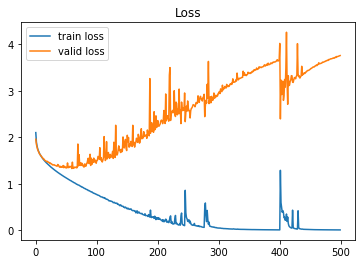

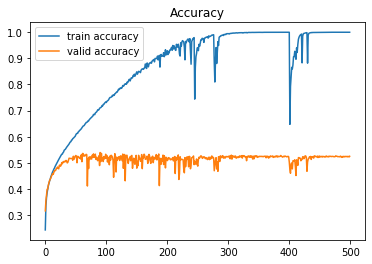

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()